<a href="https://colab.research.google.com/github/lakshuguru/DS_major-project/blob/main/Carona_pandemic_Daily_Deaths_Forecasting_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.xlsx to owid-covid-data.xlsx


In [ ]:
import pandas as pd
df=pd.read_excel('owid-covid-data.xlsx')

In [ ]:
#Questions
'''•Which country/state is having highest number of cases?
•Which country/state is having lowest number of cases?
•Which country/state is having lowest number of deaths?
•Which country/state is having highest number of deaths?
•Which country/state is most vaccinated?
'''

'•Which country/state is having highest number of cases?\n•Which country/state is having lowest number of cases?\n•Which country/state is having lowest number of deaths?\n•Which country/state is having highest number of deaths?\n•Which country/state is most vaccinated?\n'

In [ ]:
#not countries
a=['Asia','Africa','Europe','International','European Union','North America','South America','World']

In [ ]:
#removing rows with continents, world, international etc. Those which are not countries
for i in list(df[df['location'].isin(a)].index):
    df.drop([i],inplace=True)

#sorting the dataframe according to the latest date of the Data set
d=df[df['date']=='2021-06-05']

In [ ]:
#country with highest number of cases
list(d[d['total_cases']==max(d.total_cases)]['location'])

['United States']

In [ ]:
#country with least number of cases
list(d[d['total_cases']==min(d.total_cases)]['location'])

['Micronesia (country)']

In [ ]:
#country with least number of deaths
list(d[d['total_deaths']==min(d.total_deaths)]['location'])

['Bhutan', 'Grenada', 'Vanuatu']

In [ ]:
#country with highest number of deaths
list(d[d['total_deaths']==max(d.total_deaths)]['location'])

['United States']

In [ ]:
#country with most vaccinations
list(d[d['total_vaccinations']==max(df[['location','total_vaccinations']].dropna().total_vaccinations)]['location'])

['China']

In [ ]:
df.shape

(89803, 59)

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                  498
location                                     0
date                                         0
total_cases                               2981
new_cases                                 2986
new_cases_smoothed                        3951
total_deaths                             12804
new_deaths                               12769
new_deaths_smoothed                       3951
total_cases_per_million                   2981
new_cases_per_million                     2986
new_cases_smoothed_per_million            3951
total_deaths_per_million                 12804
new_deaths_per_million                   12769
new_deaths_smoothed_per_million           3951
reproduction_rate                        14910
icu_patients                             80297
icu_patients_per_million                 80297
hosp_patients                            78000
hosp_patients_per_million                78000
weekly_icu_ad

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
df=df.drop(['new_deaths_smoothed','continent','reproduction_rate','weekly_icu_admissions_per_million', 'weekly_hosp_admissions','icu_patients','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','tests_units','people_vaccinated','new_vaccinations','people_vaccinated','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','stringency_index','population','population_density','median_age','aged_70_older','handwashing_facilities','hospital_beds_per_thousand'],axis=1)

In [ ]:
df.shape

(89803, 35)

In [ ]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'icu_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'aged_65_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
a=df.location.unique()
a
#number of unique locations

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [ ]:
# to remove the Nan values from the table
df=df.fillna(0)

In [ ]:
df.isnull().sum()

iso_code                               0
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
icu_patients_per_million               0
new_tests                              0
total_tests                            0
total_tests_per_thousand               0
new_tests_per_thousand                 0
new_tests_smoothed                     0
new_tests_smoothed_per_thousand        0
positive_rate                          0
tests_per_case                         0
total_vaccinations                     0
people_fully_vac

In [ ]:
df.head(10)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0,0.0,0.0,0.026,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
2,AFG,Afghanistan,2020-02-26,1.0,0.0,0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
3,AFG,Afghanistan,2020-02-27,1.0,0.0,0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
4,AFG,Afghanistan,2020-02-28,1.0,0.0,0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
5,AFG,Afghanistan,2020-02-29,1.0,0.0,0,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
6,AFG,Afghanistan,2020-03-01,1.0,0.0,0,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
7,AFG,Afghanistan,2020-03-02,1.0,0.0,0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
8,AFG,Afghanistan,2020-03-03,2.0,1.0,0,0.0,0.0,0.051,0.026,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
9,AFG,Afghanistan,2020-03-04,4.0,2.0,0,0.0,0.0,0.103,0.051,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511


In [ ]:
df.info()
#To check the format for accessing date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89803 entries, 0 to 93739
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   iso_code                             89803 non-null  object        
 1   location                             89803 non-null  object        
 2   date                                 89803 non-null  datetime64[ns]
 3   total_cases                          89803 non-null  float64       
 4   new_cases                            89803 non-null  float64       
 5   new_cases_smoothed                   89803 non-null  int64         
 6   total_deaths                         89803 non-null  float64       
 7   new_deaths                           89803 non-null  float64       
 8   total_cases_per_million              89803 non-null  float64       
 9   new_cases_per_million                89803 non-null  float64       
 10  new_cases_

In [ ]:
df['date']=pd.to_datetime(df['date'])


In [ ]:
df_ind=df[df['location']=='India']
df_ind.tail()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
39240,IND,India,2021-06-01,28307832.0,132788.0,164291,335102.0,3207.0,20512.857,96.223,119.051,242.827,2.324,2.455,0.0,1925374.0,346792257.0,251.298,1.395,2028297.0,1.470,0.081,12.3,213135738.0,43550558,3.16,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39241,IND,India,2021-06-02,28441986.0,134154.0,153270,337989.0,2887.0,20610.069,97.213,111.065,244.919,2.092,2.355,0.0,3265073.0,350057330.0,253.664,2.366,2177976.0,1.578,0.070,14.2,215678166.0,43811342,3.17,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39242,IND,India,2021-06-03,28574350.0,132364.0,145556,340702.0,2713.0,20705.985,95.916,105.475,246.885,1.966,2.257,0.0,3725318.0,353782648.0,256.363,2.699,2401899.0,1.741,0.061,16.5,218344384.0,44047467,3.19,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39243,IND,India,2021-06-04,28694879.0,120529.0,137947,344082.0,3380.0,20793.325,87.340,99.962,249.334,2.449,2.233,0.0,3651198.0,357433846.0,259.009,2.646,2627712.0,1.904,0.000,0.0,223607768.0,44434820,3.22,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39244,IND,India,2021-06-05,28809339.0,114460.0,130648,346759.0,2677.0,20876.266,82.942,94.672,251.274,1.940,2.152,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,225571144.0,44599042,3.23,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645


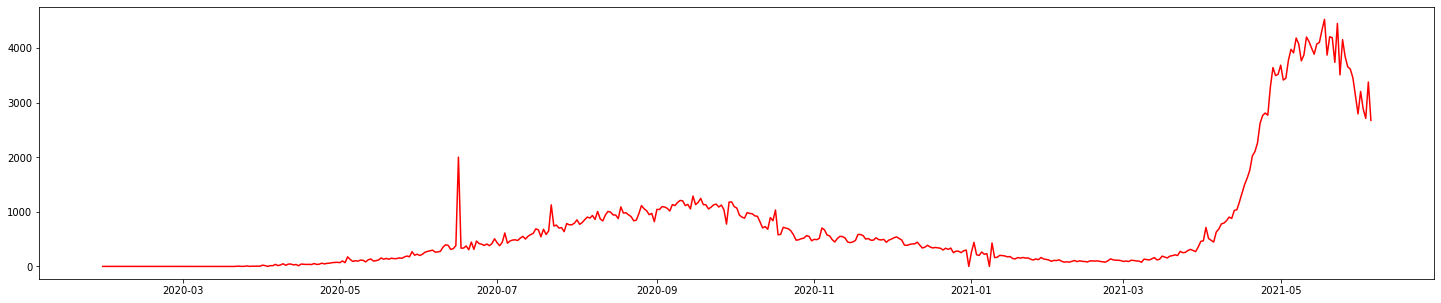

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))

plt.plot(df_ind['date'].sort_values(),df_ind['new_deaths'],c='r')

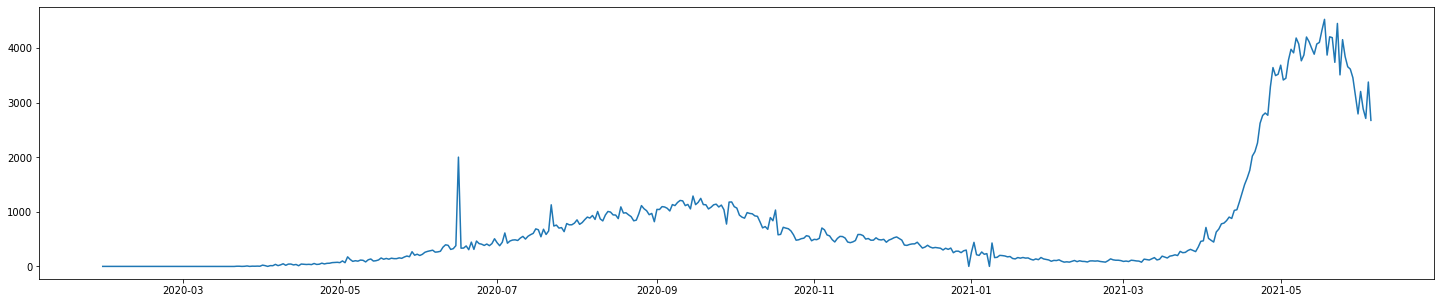

In [ ]:
plt.figure(figsize=(25,5))

plt.plot(df_ind['date'].sort_values(),df_ind['new_deaths'].rolling(1).mean())

In [ ]:

df_ind=df_ind.rename(columns={'new_deaths':'y','date':'ds'})

df_ind

,iso_code,location,ds,total_cases,new_cases,new_cases_smoothed,total_deaths,y,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
38752,IND,India,2020-01-30,1.0,1.0,0,0.0,0.0,0.001,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38753,IND,India,2020-01-31,1.0,0.0,0,0.0,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38754,IND,India,2020-02-01,1.0,0.0,0,0.0,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38755,IND,India,2020-02-02,2.0,1.0,0,0.0,0.0,0.001,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38756,IND,India,2020-02-03,3.0,1.0,0,0.0,0.0,0.002,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39240,IND,India,2021-06-01,28307832.0,132788.0,164291,335102.0,3207.0,20512.857,96.223,119.051,242.827,2.324,2.455,0.0,1925374.0,346792257.0,251.298,1.395,2028297.0,1.470,0.081,12.3,213135738.0,43550558,3.16,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39241,IND,India,2021-06-02,28441986.0,134154.0,153270,337989.0,2887.0,20610.069,97.213,111.065,244.919,2.092,2.355,0.0,3265073.0,350057330.0,253.664,2.366,2177976.0,1.578,0.070,14.2,215678166.0,43811342,3.17,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39242,IND,India,2021-06-03,28574350.0,132364.0,145556,340702.0,2713.0,20705.985,95.916,105.475,246.885,1.966,2.257,0.0,3725318.0,353782648.0,256.363,2.699,2401899.0,1.741,0.061,16.5,218344384.0,44047467,3.19,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39243,IND,India,2021-06-04,28694879.0,120529.0,137947,344082.0,3380.0,20793.325,87.340,99.962,249.334,2.449,2.233,0.0,3651198.0,357433846.0,259.009,2.646,2627712.0,1.904,0.000,0.0,223607768.0,44434820,3.22,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645


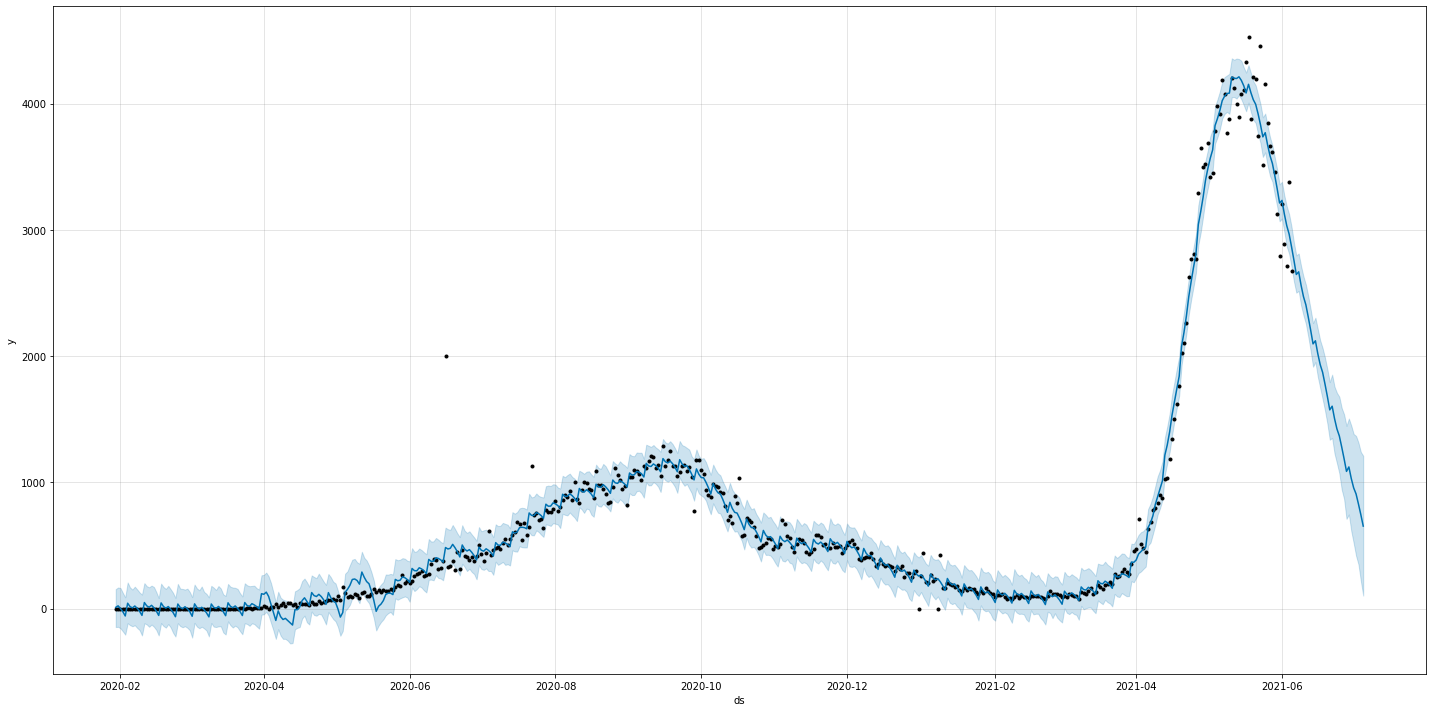

In [ ]:
from fbprophet import Prophet

#forecasting Number of Daily Deaths upto 30 days

model=Prophet(changepoint_prior_scale=1,daily_seasonality=True,yearly_seasonality=True)
model.fit(df_ind)
x=model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(x)

#pandas plotting
model.plot(forecast,figsize=(20,10));

In [ ]:
df2=forecast[['ds','trend','yhat']]
df2.tail(30)

#Trend for 30 days, forecasting Number of Deaths from May 7th - declination in deaths

,ds,trend,yhat
493,2021-06-06,-1228.920382,2759.879602
494,2021-06-07,-1241.852674,2646.479130
495,2021-06-08,-1254.784966,2667.432198
496,2021-06-09,-1267.717259,2560.553155
497,2021-06-10,-1280.649551,2470.804274
498,2021-06-11,-1293.581843,2406.463989
499,2021-06-12,-1306.514136,2309.343087
500,2021-06-13,-1319.446428,2206.637313
501,2021-06-14,-1332.378720,2096.789326
502,2021-06-15,-1345.311013,2121.438269


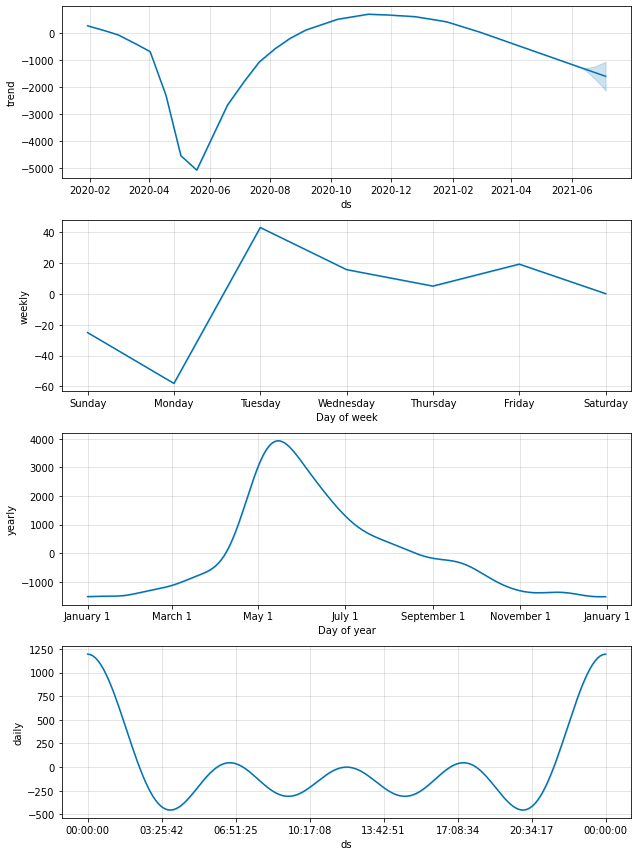

In [ ]:
#componential visualization of forecast dataframe in terms of daily, weekly and yearly

fig2 = model.plot_components(forecast)